<a href="https://colab.research.google.com/github/jewel-pruthi/machine-learning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries for setup**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

**About the MNIST dataset used in the notebook:**

It's a set of 70K images of digits handwritten by high school students and employees of US Census Bureau

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
X.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [12]:
eg_digit = X.loc[0]
eg_digit_img = eg_digit.to_numpy() #convert an image record (pandas series) to a numpy array
eg_digit_img = eg_digit_img.reshape(28,28)

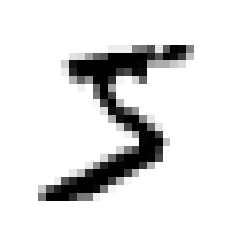

In [13]:
plt.imshow(eg_digit_img, cmap = "binary")
plt.axis("off")
plt.show()

In [15]:
y[0]

'5'

In [16]:
y = y.astype(np.uint8)
y[0]

5

**Train test split**

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("Training set size : ", X_train.shape , ", " ,y_train.shape)
print("Test set size : " , X_test.shape , ", " , y_test.shape)

Training set size :  (60000, 784) ,  (60000,)
Test set size :  (10000, 784) ,  (10000,)


**Training a binary classifer : Stochastic Gradient Descent (SGD) **

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([eg_digit])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [22]:
cross_val_score( sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy" )

array([0.95035, 0.96035, 0.9604 ])

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

**Model Evaluation Metrics : Precision Recall Tradeoff**

In [35]:
cm = confusion_matrix( y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [36]:
sensitivity = cm[1,1]/(cm[1,0]+ cm[1,1]) 
sensitivity

0.6511713705958311

We can see a 65% True Positive Rate i.e. sensitivity

In [37]:
specificity = cm[0,0]/ (cm[0,0] + cm[0,1])
specificity

0.987412741164184

In [38]:
precision = cm[1,1]/ (cm[0,1] + cm[1,1])
precision

0.8370879772350012

We can see that 83% of the samples that were predicted as a 5 were correctly classified

In [41]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [42]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [44]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

F1 score favors classifiers with similar precision and recall. However, we don't always want that, in some cases we would prefer one over the other. 

For e.g. we expect a low recall and high precision in detecting videos that are safe for kids i.e. rejecting more good videos
Vs
we expect a high recall and low precision to detect shop-lifters i.e. tolerance towards a relatively large number of false positives

**Deciding which threshold to use for classification**

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [51]:
y_scores.shape

(60000,)

In [52]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

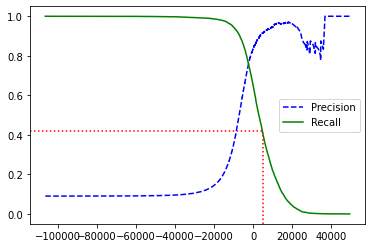

In [87]:
def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.legend()
  plt.axvline(color = 'r', ls = ':', x = 5000, ymax = 0.42)
  plt.axhline(color = 'r', ls = ':', y = 0.42, xmax = 0.7)
  # plt.axhline(color = 'r', ls = ':', y = 0.9)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

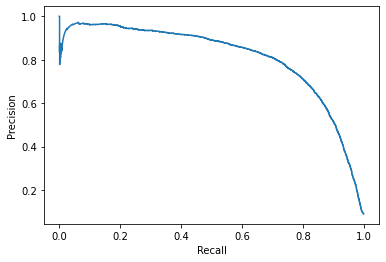

In [93]:
plt.plot(recalls, precisions )
plt.xlabel('Recall')
plt.ylabel('Precision')
# plt.axvline(x = 0.5, ymax = 0.85, color = 'r', ls = ':')

**Figuring out the lowest threshold which results in 90% precision**

In [95]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.019499143958

In [96]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [97]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [98]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [100]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

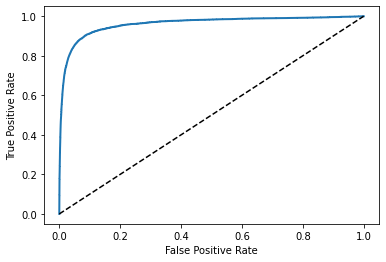

In [102]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth = 2, label=label)
  plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [105]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Let's now try a Random Forest Classifier and compare its ROC curve and ROC AUC score to that of Stochastic Gradient Descent Classifier**

In [109]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [110]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

**Evaluating multiple models (Stochastic Gradient Descent vs Random Forest Classifier) through ROC AUC curve**

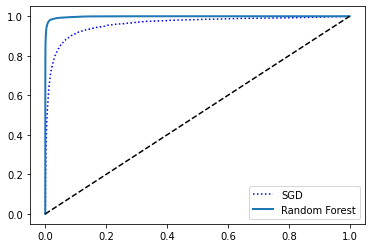

In [111]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

**We can see that the ROC curve for Random Forest is much better than SGD as the curve is more closer to 1 on the top left corner & thus has a greater area under the curve (AUC)**

In [112]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [115]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [117]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3)
y_pred_forest

array([ True, False, False, ...,  True, False, False])

In [118]:
precision_score(y_train_5, y_pred_forest)

0.9905083315756169

In [119]:
recall_score(y_train_5, y_pred_forest)

0.8662608374838591